In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as pc
import matplotlib as mpl
from matplotlib import ticker as tck
import scipy as sci
from matplotlib import ticker
from scipy.signal import argrelextrema
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#not all these imports are needed, I just copy ones from other notebooks

%matplotlib inline

In [36]:
# Values I found and used, no reflection or filtering
# all units in the code are used with base SI, comments just show the commonly referenced units
lm = 800*10**-9 #wavelength of laser, lambda, 800 nm 
l = 10**-3 #length of ZnTe crystal, L, 1 mm
ind = 2.8528 #index of refraction, n, of ZnTe at 800 nm
r41 = 3.9*10**-12 #electro-optic coefficient r41 ZnTe pm/V
ETHz = 10*10**3/10**-2  #THz electric field E strength, MV/cm or kV/cm. THIS IS THE VALUE THAT CHANGES
w = 2*np.pi*pc.c/lm  #angular frequency, omega, of 800 nm laser, Hz
lp = 1*np.pi/3 #angle of laser linear polarization
p = np.pi/4 #angle of QWP
h = np.pi/4 #h is the angle of fast axis of EO crystal which is pi/4 if the THz wave is horizontally (p) linearly polarized 
h90 = np.pi/2 - lp  #alpha in planken, ETHz angle from z (001), should be same as probe laser polarization
lp90 = np.pi/2 - lp #phi in planken, laser polarization angle from z (001)
plankth = -np.arctan(2*np.tan(h90))/2 #theta in planken, from equation 6 in planken
#n = (1/(2*lm))*2*np.pi*ind**3*r41*ETHz*l*((np.cos(h90)*(np.sin(plankth))**2-np.cos(h90)*(np.cos(plankth))**2+2*np.cos(h90+2*plankth))) #phase difference between fast and slow axis of EO crystal variable waveplate
#and the ZnTe (110) crystal is ideally positioned with [001] vertical and [-110] horizontal
#n = (1/(2*lm))*2*np.pi*ind**3*r41*ETHz*l*(np.cos(h90)*np.cos(2*plankth)-2*np.sin(h90)*np.sin(2*plankth))
n = (1/(lm))*2*np.pi*ind**3*r41*ETHz*l
t = np.linspace(0,2*np.pi/w) #time wave propagates for a 2*pi cycle
ovr = (np.pi/2)*2*lm/(2*np.pi*ind**3*r41*l*(np.cos(h90)*np.cos(2*plankth)-2*np.sin(h90)*np.sin(2*plankth)))#/(10**3/10**-2) # = ETHz kV/cm (if 10's are left in) when overrotation occurs, n = pi/2, (ETHz > 22 kV/cm)
#ovr = (np.pi/2)*lm/(2*np.pi*ind**3*r41*l)#/(10**3/10**-2) # = ETHz kV/cm (if 10's are left in) when overrotation occurs, n = pi/2, (ETHz > 22 kV/cm)
ovrpi = (np.pi)*2*lm/(2*np.pi*ind**3*r41*l*(np.cos(h90)*np.cos(2*plankth)-2*np.sin(h90)*np.sin(2*plankth)))/(10**3/10**-2) # = ETHz kV/cm when overrotation occurs, n = pi/2, (ETHz > 44 kV/cm)
#ovrpi = (np.pi)*lm/(2*np.pi*ind**3*r41*l)/(10**3/10**-2) # = ETHz kV/cm when overrotation occurs, n = pi/2, (ETHz > 44 kV/cm)
(ovr,ovrpi)

(3339353.400640232, 66.78706801280464)

IPython console for SymPy 1.5.1 (Python 3.7.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.5.1/



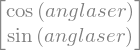

In [38]:
#jones vector of linearly polarized probe laser with angle anglaser

sp.init_session()
anglaser = sp.symbols('anglaser')
linpol = sp.Matrix([sp.cos(anglaser),sp.sin(anglaser)]) 
linpol

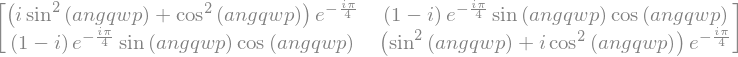

In [39]:
#QWP matrix with fast axis angle angqwp from horizontal axis, as seen in wikipedia jones calculus

angqwp = sp.symbols('angqwp')
qwpmat = sp.exp(-I*sp.pi/4)*sp.Matrix([[sp.cos(angqwp)**2+I*sp.sin(angqwp)**2, (1-I)*sp.sin(angqwp)*sp.cos(angqwp)], [(1-I)*sp.sin(angqwp)*sp.cos(angqwp), sp.sin(angqwp)**2+I*sp.cos(angqwp)**2]])
qwpmat

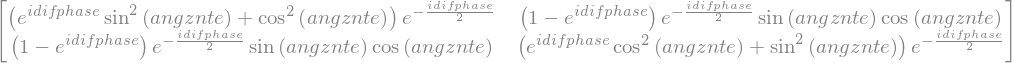

In [40]:
#znte matrix with fast axis (-111) at angle angznte, with phase 
#difference between the fast and slow axes as difphase

angznte = sp.symbols('angznte')
difphase = sp.symbols('difphase')
zntemat = sp.exp(-I*difphase/2)*sp.Matrix([[sp.cos(angznte)**2+sp.exp(I*difphase)*sp.sin(angznte)**2,(1-sp.exp(I*difphase))*sp.cos(angznte)*sp.sin(angznte)],[(1-sp.exp(I*difphase))*sp.cos(angznte)*sp.sin(angznte),sp.sin(angznte)**2+sp.exp(I*difphase)*sp.cos(angznte)**2]])
zntemat

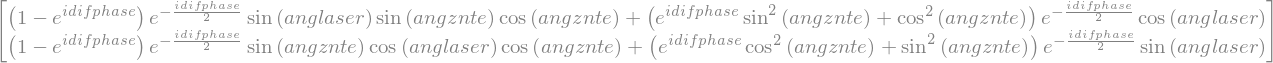

In [41]:
#matrix multiplication showing laser polarization after the znte EO crystal

afterzntemat = zntemat*linpol
afterzntemat

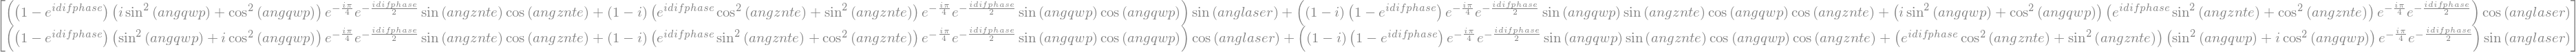

In [42]:
#matrix multiplication showing polarization after QWP

afterqwpmat = qwpmat*zntemat*linpol
afterqwpmat

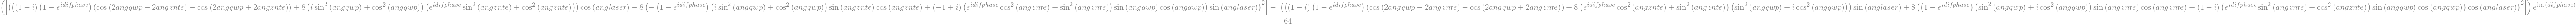

In [43]:
#This takes a long time to run
sp.simplify(sp.functions.Abs(afterqwpmat[0]**2)-sp.functions.Abs(afterqwpmat[1]**2))

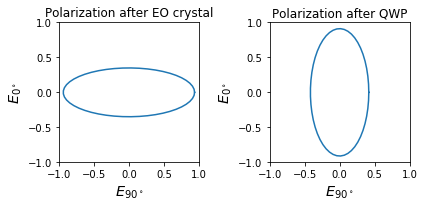

In [3]:
plt.figure(figsize = (6,3))

plt.subplot(121, aspect = 'equal')
xeeo = np.real(np.exp(-1.j*w*t)*(np.exp(1.j*n/2)*np.cos(h)**2+np.exp(-1.j*n/2)*np.sin(h)**2))
yeeo = np.real(np.exp(-1.j*w*t)*(-np.exp(-1.j*n/2)+np.exp(1.j*n/2))*np.cos(h)*np.sin(h))
plt.plot(xeeo,yeeo)
plt.xlabel('$E_{90^\circ}$', size = "x-large")
plt.ylabel('$E_{0^\circ}$', size = "x-large")
plt.title('Polarization after EO crystal')
plt.axis([-1,1,-1,1])

plt.subplot(122, aspect = 'equal')
xeq = np.real(np.exp(-1.j*w*t)*((-np.exp(-1.j*np.pi/4)+np.exp(1.j*np.pi/4))*(-np.exp(-1.j*n/2)+np.exp(1.j*n/2))*np.cos(h)*np.cos(p)*np.sin(h)*np.sin(p)+(np.exp(1.j*n/2)*np.cos(h)**2+np.exp(-1.j*n/2)*np.sin(h)**2)*(np.exp(1.j*np.pi/4)*np.cos(p)**2+np.exp(-1.j*np.pi/4)*np.sin(p)**2)))
yeq = np.real(np.exp(-1.j*w*t)*((-np.exp(-1.j*np.pi/4)+np.exp(1.j*np.pi/4))*np.cos(p)*(np.exp(1.j*n/2)*np.cos(h)**2+np.exp(-1.j*n/2)*np.sin(h)**2)*np.sin(p)+(-np.exp(-1.j*n/2)+np.exp(1.j*n/2))*np.cos(h)*np.sin(h)*(np.exp(1.j*np.pi/4)*np.cos(p)**2+np.exp(-1.j*np.pi/4)*np.sin(p)**2)))
plt.plot(xeq,yeq)
plt.xlabel('$E_{90^\circ}$', size = "x-large")
plt.ylabel('$E_{0^\circ}$', size = "x-large")
plt.title('Polarization after QWP')
plt.axis([-1,1,-1,1])

#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.08, right=0.92, hspace=0.4,wspace=0.4)
plt.tight_layout()
plt.show()
#plt.savefig('eopovrpip3kvpcm.pdf')

In [4]:
difafterqwp = xeq**2-yeq**2 

In [5]:
sum(difafterqwp)

-15.817861301182202

In [6]:
sum(xeeo**2-yeeo**2)

19.440100383983747

In [7]:
# change values here to check different polarizations
# Values I found and used, no reflection or filtering
# all units in the code are used with base SI, comments show the commonly referenced units
#different phase differences, maximized or not, can be commented in or out with #

lam = 800*10**-9 #wavelength of laser, lambda, 800 nm 
length = 10**-3 #length of ZnTe crystal, L, 1 mm
indref = 2.8528 #index of refraction, eta or capital lambda, of ZnTe at 800 nm
r41 = 3.9*10**-12 #electro-optic coefficient r41 ZnTe pm/V
ETHz = 3*10**3/10**-2  #THz electric field E strength, MV/cm or kV/cm. this value changes while probing (replaced with digitized E field THz data)
angfreq = 2*np.pi*pc.c/lam  #angular frequency, omega, of 800 nm laser, Hz
laserang = 0*np.pi/10 #angle of laser linear polarization from horizontal axis
qwpang = np.pi/4 #angle of QWP from horizontal axis, ideally at pi/4
znteang = np.pi/4 #angle of fast axis of EO crystal (from horizontal axis), ideally at pi/4  
plankalph = np.pi/2 - laserang  #alpha in planken, ETHz angle from z (001), should be same as probe laser polarization since ideally they are generated with the same polarization in many setups, though this could be different due to misalignment of off axis parabolic mirrors, for example
plankphi = np.pi/2 - laserang #phi in planken, laser polarization angle from z (001)
plankth = -np.arctan(2*np.tan(plankalph))/2 #theta in planken, from equation 6 in planken
#phasedif = (1/(2*lam))*2*np.pi*ind**3*r41*ETHz*length*((np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth))) #phase difference at any angle from equation 7 in planken
#phasedif = (1/(2*lam))*2*np.pi*indref**3*r41*ETHz*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth)) #this phase difference is the same as the last but simplified
phasedif = (1/(lam))*2*np.pi*indref**3*r41*ETHz*length #phase difference between fast and slow axis of EO crystal variable waveplate
#and the ZnTe (110) crystal is ideally positioned with [001] vertical and [-110] horizontal
time = np.linspace(0,2*np.pi/angfreq) #time wave propagates for a 2*pi cycle
#ovr = (np.pi/2)*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth)))#/(10**3/10**-2) # = ETHz kV/cm (if 10's are left in) when overrotation occurs, phasedif = pi/2, (ETHz > 22 kV/cm)
ovr = (np.pi/2)*lam/(2*np.pi*indref**3*r41*length)#/(10**3/10**-2)
ovrmaximized = (np.pi/2)*lam/(2*np.pi*indref**3*r41*length)#/(10**3/10**-2) # = ETHz kV/cm (if 10's are left in) when overrotation occurs, phasedif = pi/2, (ETHz > 22 kV/cm)
#ovrpi = (np.pi)*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth)))/(10**3/10**-2) # = ETHz kV/cm when overrotation occurs without the qwp, phasedif = pi, (ETHz > 44 kV/cm)
ovrpi = (np.pi)*lam/(2*np.pi*indref**3*r41*length)/(10**3/10**-2) # = ETHz kV/cm when overrotation occurs without the qwp, phasedif = pi, (ETHz > 44 kV/cm)
(ovr,ovrpi, ovrmaximized, (np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth)))

(2208774.6594629735, 44.17549318925947, 2208774.6594629735, 2.0)

In [8]:
#importing digitized data from ibrahim/ozaki, where 'a' and 'b' are the columns, left and right, showing over-rotation and not, respectively
#and 1-4 counts each plot from the top of the figure down
datafig4a1 = np.loadtxt('f4a1.csv', delimiter = ',', unpack = True)
datafig4a2 = np.loadtxt('f4a2.csv', delimiter = ',', unpack = True)
datafig4a3 = np.loadtxt('f4a3.csv', delimiter = ',', unpack = True)
datafig4a4 = np.loadtxt('f4a4.csv', delimiter = ',', unpack = True)
datafig4b1 = np.loadtxt('f4b1.csv', delimiter = ',', unpack = True)
datafig4b2 = np.loadtxt('ffb2.csv', delimiter = ',', unpack = True)
datafig4b3 = np.loadtxt('ffb3.csv', delimiter = ',', unpack = True)
datafig4b4 = np.loadtxt('ffb4.csv', delimiter = ',', unpack = True)

In [9]:
'''
times and amplitudes of each plot
'''
a1time = datafig4a1[0]
a1amp = datafig4a1[1]
a2time = datafig4a2[0]
a2amp = datafig4a2[1]
a3time = datafig4a3[0]
a3amp = datafig4a3[1]
a4time = datafig4a4[0]
a4amp = datafig4a4[1]
b1time = datafig4b1[0]
b1amp = datafig4b1[1]
b2time = datafig4b2[0]
b2amp = datafig4b2[1]
b3time = datafig4b3[0]
b3amp = datafig4b3[1]
b4time = datafig4b4[0]
b4amp = datafig4b4[1]

In [10]:
'''
the amplitudes are supposed to be normalized,
but the data taken from the plots aren't 
exactly so they are renormalized here
'''
a1ampnorm = a1amp/np.max(np.abs(a1amp))
a2ampnorm = a2amp/np.max(np.abs(a2amp))
a3ampnorm = a3amp/np.max(np.abs(a3amp))
a4ampnorm = a4amp/np.max(np.abs(a4amp))
b1ampnorm = b1amp/np.max(np.abs(b1amp))
b2ampnorm = b2amp/np.max(np.abs(b2amp))
b3ampnorm = b3amp/np.max(np.abs(b3amp))
b4ampnorm = b4amp/np.max(np.abs(b4amp))

In [11]:
'''
the amplitudes are supposed to be normalized,
but the data taken from the plots aren't 
exactly so they are renormalized here
'''
a1ampnorm = a1amp/np.max(np.abs(a1amp))
a2ampnorm = a2amp/np.max(np.abs(a2amp))
a3ampnorm = a3amp/np.max(np.abs(a3amp))
a4ampnorm = a4amp/np.max(np.abs(a4amp))
b1ampnorm = b1amp/np.max(np.abs(b1amp))
b2ampnorm = b2amp/np.max(np.abs(b2amp))
b3ampnorm = b3amp/np.max(np.abs(b3amp))
b4ampnorm = b4amp/np.max(np.abs(b4amp))

In [12]:
'''
All non-over-rotated (b) plots can all be based off 47 kV/cm = pi/2
since this above this is where over-rotation is said
to occur. 
'''
b1overrot47 = b1ampnorm*64/47
b2overrot47 = b2ampnorm*59/47
b3overrot47 = b3ampnorm*54/47
b4overrot47 = b4ampnorm

In [13]:
'''
The sine can be taken to show over rotation for values higher than 47 kV/cm
'''
b1overrot47sin = np.sin((np.pi/2)*b1overrot47)
b2overrot47sin = np.sin((np.pi/2)*b2overrot47)
b3overrot47sin = np.sin((np.pi/2)*b3overrot47)
b4overrot47sin = np.sin((np.pi/2)*b4overrot47)

In [14]:
'''
The cosine can be taken of each non over-rotated plot,
as if the qwp isn't used.
'''
b1overrot47cos = np.cos((np.pi/2)*b1overrot47)
b2overrot47cos = np.cos((np.pi/2)*b2overrot47)
b3overrot47cos = np.cos((np.pi/2)*b3overrot47)
b4overrot47cos = np.cos((np.pi/2)*b4overrot47)

In [15]:
'''
All non-over-rotated (b) plots can all be based off 22.087746594629735 kV/cm 
gives pi/2 over-rotation
since this above this is where over-rotation should
occur under maximized circumstances with no reflection. 
'''
b1overrot22more = b1ampnorm*(64/47)*ovrmaximized*2 #alter this to have more overrotations
b1overrot22 = b1ampnorm*(64/47)*ovrmaximized 
b2overrot22 = b2ampnorm*(59/47)*ovrmaximized 
b3overrot22 = b3ampnorm*(54/47)*ovrmaximized 
b4overrot22 = b4ampnorm*ovrmaximized 

max(b4overrot22)

2208774.6594629735

In [16]:
#this give the phase differences in the znte crystal from each digitized ETHz value
#maximized or not can be commented in or out

phasedifb1more = 2*np.pi*indref**3*r41*b1overrot22more*length/lam 
#phasedifbmore = (1/(2*lam))*2*np.pi*indref**3*r41*b1overrotmore*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

phasedifb1 = 2*np.pi*indref**3*r41*b1overrot22*length/lam 
#phasedifb1 = (1/(2*lam))*2*np.pi*indref**3*r41*b1overrot22*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

phasedifb2 = 2*np.pi*indref**3*r41*b2overrot22*length/lam 
#phasedifb2 = (1/(2*lam))*2*np.pi*indref**3*r41*b2overrot22*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

phasedifb3 = 2*np.pi*indref**3*r41*b3overrot22*length/lam 
#phasedifb3 = (1/(2*lam))*2*np.pi*indref**3*r41*b3overrot22*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

phasedifb4 = 2*np.pi*indref**3*r41*b4overrot22*length/lam 
#phasedifb4 = (1/(2*lam))*2*np.pi*indref**3*r41*b4overrot22*length*(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

(np.cos(plankalph)*np.cos(2*plankth)-2*np.sin(plankalph)*np.sin(2*plankth))

2.0

In [17]:
#this uses the functions from afterqwpmat and afterzntemat to find the electic field values from digitized results
#in the 0 and 90 degree directions

angqwp = qwpang
angznte = znteang
anglaser = laserang

difphase = phasedifb1more

afterqwpmatvalsb1e90rmore = np.array(((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.cos(anglaser) + ((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte) + (1.0 - 1.j)*(np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp))*np.sin(anglaser))

afterqwpmatvalsb1e0rmore = np.array(((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.sin(anglaser) + ((1.0 - 1.j)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp) + (-np.exp(1.j*difphase) + 1)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte))*np.cos(anglaser))

afterzntematvalsb1e90rmore = np.array((np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.cos(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser)*np.sin(angznte)*np.cos(angznte))

afterzntematvalsb1e0rmore = np.array((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(anglaser)*np.cos(angznte))

difphase = phasedifb1

afterqwpmatvalsb1e90r = np.array(((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.cos(anglaser) + ((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte) + (1.0 - 1.j)*(np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp))*np.sin(anglaser))

afterqwpmatvalsb1e0r = np.array(((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.sin(anglaser) + ((1.0 - 1.j)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp) + (-np.exp(1.j*difphase) + 1)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte))*np.cos(anglaser))

afterzntematvalsb1e90r = np.array((np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.cos(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser)*np.sin(angznte)*np.cos(angznte))

afterzntematvalsb1e0r = np.array((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(anglaser)*np.cos(angznte))

difphase = phasedifb2

afterqwpmatvalsb2e90r = np.array(((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.cos(anglaser) + ((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte) + (1.0 - 1.j)*(np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp))*np.sin(anglaser))

afterqwpmatvalsb2e0r = np.array(((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.sin(anglaser) + ((1.0 - 1.j)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp) + (-np.exp(1.j*difphase) + 1)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte))*np.cos(anglaser))

afterzntematvalsb2e90r = np.array((np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.cos(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser)*np.sin(angznte)*np.cos(angznte))

afterzntematvalsb2e0r = np.array((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(anglaser)*np.cos(angznte))

difphase = phasedifb3

afterqwpmatvalsb3e90r = np.array(((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.cos(anglaser) + ((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte) + (1.0 - 1.j)*(np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp))*np.sin(anglaser))

afterqwpmatvalsb3e0r = np.array(((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.sin(anglaser) + ((1.0 - 1.j)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp) + (-np.exp(1.j*difphase) + 1)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte))*np.cos(anglaser))

afterzntematvalsb3e90r = np.array((np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.cos(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser)*np.sin(angznte)*np.cos(angznte))

afterzntematvalsb3e0r = np.array((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(anglaser)*np.cos(angznte))

difphase = phasedifb4

afterqwpmatvalsb4e90r = np.array(((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.cos(anglaser) + ((1.j*np.sin(angqwp)**2 + np.cos(angqwp)**2)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte) + (1.0 - 1.j)*(np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp))*np.sin(anglaser))

afterqwpmatvalsb4e0r = np.array(((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase) + (1.0 - 1.j)*(-np.exp(1.j*difphase) + 1)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.sin(angznte)*np.cos(angqwp)*np.cos(angznte))*np.sin(anglaser) + ((1.0 - 1.j)*(np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angqwp)*np.cos(angqwp) + (-np.exp(1.j*difphase) + 1)*(np.sin(angqwp)**2 + 1.j*np.cos(angqwp)**2)*np.exp(-0.25*1.j*np.pi)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(angznte))*np.cos(anglaser))

afterzntematvalsb4e90r = np.array((np.exp(1.j*difphase)*np.sin(angznte)**2 + np.cos(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.cos(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser)*np.sin(angznte)*np.cos(angznte))

afterzntematvalsb4e0r = np.array((np.exp(1.j*difphase)*np.cos(angznte)**2 + np.sin(angznte)**2)*np.exp(-0.5*1.j*difphase)*np.sin(anglaser) + (-np.exp(1.j*difphase) + 1)*np.exp(-0.5*1.j*difphase)*np.sin(angznte)*np.cos(anglaser)*np.cos(angznte))


In [18]:
#this cell and the next ones gives delta I, the intensity difference between the 0 and 90 electric field polarizations
#they are done in separate cells again becuase they take time to run 

difinefieldafterqwpb1rmore = abs(afterqwpmatvalsb1e0rmore)**2-abs(afterqwpmatvalsb1e90rmore)**2
#difinefieldafterqwpb1rmore

difinefieldafterznteb1rmore = abs(afterzntematvalsb1e0rmore)**2-abs(afterzntematvalsb1e90rmore)**2
#difinefieldafterznteb1rmore

difinefieldafterqwpb1r = abs(afterqwpmatvalsb1e0r)**2-abs(afterqwpmatvalsb1e90r)**2
#difinefieldafterqwpb1r

difinefieldafterznteb1r = abs(afterzntematvalsb1e0r)**2-abs(afterzntematvalsb1e90r)**2
#difinefieldafterznteb1r

difinefieldafterqwpb2r = abs(afterqwpmatvalsb2e0r)**2-abs(afterqwpmatvalsb2e90r)**2
#difinefieldafterqwpb2r

difinefieldafterznteb2r = abs(afterzntematvalsb2e0r)**2-abs(afterzntematvalsb2e90r)**2
#difinefieldafterznteb2r

difinefieldafterqwpb3r = abs(afterqwpmatvalsb3e0r)**2-abs(afterqwpmatvalsb3e90r)**2
#difinefieldafterqwpb3r

difinefieldafterznteb3r = abs(afterzntematvalsb3e0r)**2-abs(afterzntematvalsb3e90r)**2
#difinefieldafterznteb3r

difinefieldafterqwpb4r = abs(afterqwpmatvalsb4e0r)**2-abs(afterqwpmatvalsb4e90r)**2
#difinefieldafterqwpb4r

difinefieldafterznteb4r = abs(afterzntematvalsb4e0r)**2-abs(afterzntematvalsb4e90r)**2
#difinefieldafterznteb4r

max(difinefieldafterqwpb1r)

0.9999979617104439

In [19]:
#this corrects for delta I, as in equation 12 in the text (or equation 8 in planken if non maximized angles are used,
# or equation 11 in the text if values before the qwp are used, these can be commented in or out),
#choose one depending on laser probe angle 
#(if maximized horizontally at 0 degrees or not), results are separated for each case again

#ETHzresultsqwpb1rmore = np.arcsin(difinefieldafterqwpb1rmore*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsqwpb1rmore = np.arcsin(difinefieldafterqwpb1rmore)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsqwpb1rmore)

#ETHzresultsznteb1rmore = np.arccos(difinefieldafterznteb1rmore*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsznteb1rmore = np.arccos(difinefieldafterznteb1rmore)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsznteb1rmore)

#ETHzresultsqwpb1r = np.arcsin(difinefieldafterqwpb1r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsqwpb1r = np.arcsin(difinefieldafterqwpb1r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsqwpb1r)

#ETHzresultsznteb1r = np.arccos(difinefieldafterznteb1r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsznteb1r = np.arccos(difinefieldafterznteb1r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsznteb1r)

#ETHzresultsqwpb2r = np.arcsin(difinefieldafterqwpb2r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsqwpb2r = np.arcsin(difinefieldafterqwpb2r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsqwpb2r)

#ETHzresultsznteb2r = np.arccos(difinefieldafterznteb2r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsznteb2r = np.arccos(difinefieldafterznteb2r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsznteb2r)

#ETHzresultsqwpb3r = np.arcsin(difinefieldafterqwpb3r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsqwpb3r = np.arcsin(difinefieldafterqwpb3r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsqwpb3r)

#ETHzresultsznteb3r = np.arccos(difinefieldafterznteb3r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsznteb3r = np.arccos(difinefieldafterznteb3r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsznteb3r)

#ETHzresultsqwpb4r = np.arcsin(difinefieldafterqwpb4r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsqwpb4r = np.arcsin(difinefieldafterqwpb4r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsqwpb4r)

#ETHzresultsznteb4r = np.arccos(difinefieldafterznteb4r*np.sin(2*(plankphi-plankth)))*2*lam/(2*np.pi*indref**3*r41*length*(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)))
ETHzresultsznteb4r = np.arccos(difinefieldafterznteb4r)*lam/(2*np.pi*indref**3*r41*length)
#max(ETHzresultsznteb4r)

(np.cos(plankalph)*(np.sin(plankth))**2-np.cos(plankalph)*(np.cos(plankth))**2+2*np.cos(plankalph+2*plankth)),np.sin(2*(plankphi-plankth))

C:\Users\Gregory\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in arcsin


(2.0, -1.0)

In [20]:
ETHzresultsqwpnosinb1r = (difinefieldafterqwpb1r)*lam/(2*np.pi*indref**3*r41*length)
ETHzresultsqwpnosinb1rmore = (difinefieldafterqwpb1rmore)*lam/(2*np.pi*indref**3*r41*length)

In [21]:
max(b4overrot22)*10**-3*10**-2

22.087746594629735

In [22]:
min(-ETHzresultsznteb1r*10**-2/10**3)/2

-22.086312473969418

In [23]:
min(-ETHzresultsznteb1r*10**-2/10**3)

-44.172624947938836

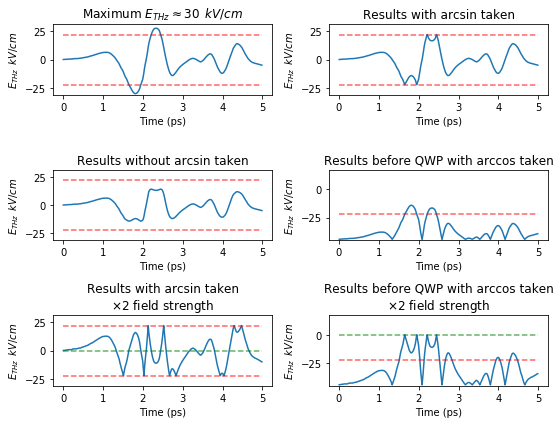

In [24]:
plt.figure(figsize = (8,6))

plt.subplot(321)
plt.plot(b1time, b1overrot22*10**-3*10**-2)
plt.plot(np.linspace(0,5,100),[max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--',alpha=0.6)
plt.plot(np.linspace(0,5,100),[-max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--',alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-31,31)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title(r'Maximum $E_{THz}\approx 30 \enspace kV/cm$')

plt.subplot(322)
plt.plot(b1time, ETHzresultsqwpb1r*10**-3*10**-2)
plt.plot(np.linspace(0,5,100),[max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--', alpha=0.6)
plt.plot(np.linspace(0,5,100),[-max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--',alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-31,31)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Results with arcsin taken')

plt.subplot(323)
plt.plot(b1time, ETHzresultsqwpnosinb1r*10**-3*10**-2)
plt.plot(np.linspace(0,5,100),[max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--', alpha=0.6)
plt.plot(np.linspace(0,5,100),[-max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--',alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-31,31)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Results without arcsin taken')

plt.subplot(324)
plt.plot(b1time, -ETHzresultsznteb1r*10**-2/10**3)
plt.plot(np.linspace(0,5,100),[min(-ETHzresultsznteb1r*10**-2/10**3)+max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--', alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-45,17)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Results before QWP with arccos taken')

plt.subplot(325)
plt.plot(b1time, ETHzresultsqwpb1rmore*10**-3*10**-2)
plt.plot(np.linspace(0,5,100),[max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--', alpha=0.6)
plt.plot(np.linspace(0,5,100),[-max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--',alpha=0.6)
plt.plot(np.linspace(0,5,100),[-max(b4overrot22)*10**-3*10**-2*0 for i in range(100)], 'g--',alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-31,31)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Results with arcsin taken' + '\n' + r'$\times 2$ field strength')

plt.subplot(326)
plt.plot(b1time, -ETHzresultsznteb1rmore*10**-2/10**3)
plt.plot(np.linspace(0,5,100),[min(-ETHzresultsznteb1rmore*10**-2/10**3)/2+max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'g--', alpha=0.6)
plt.plot(np.linspace(0,5,100),[min(-ETHzresultsznteb1rmore*10**-2/10**3)+max(b4overrot22)*10**-3*10**-2 for i in range(100)], 'r--', alpha=0.6)
plt.xlabel('Time (ps)')
plt.ylabel(r'$E_{THz}\enspace kV/cm $')
plt.ylim(-45,17)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Results before QWP with arccos taken' + '\n' + r'$\times 2$ field strength')

plt.tight_layout()
#plt.savefig('ibrahimdata30fedit.pdf')
plt.show()


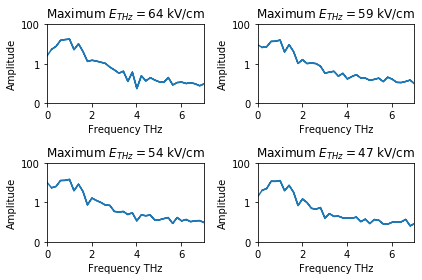

In [25]:
#plots of FFT's of each digitized plot

fig1 = plt.figure()
ax1 = fig1.add_subplot(2,2,1)
ax1.set_yscale('log')
sp12 = abs(np.fft.fft(b1overrot47, norm = 'ortho'))
freq12 = abs(np.fft.fftfreq(b1time.shape[-1], d = 0.0006))
plt.plot(freq12, sp12.real)
plt.xlim(0,7)
plt.ylim(0.01,100)
plt.xlabel('Frequency THz')
plt.ylabel('Amplitude')
plt.title('Maximum $E_{THz}=$64 kV/cm')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())
 

ax1 = fig1.add_subplot(2,2,2)
ax1.set_yscale('log')
sp12 = abs(np.fft.fft(b2overrot47, norm = 'ortho'))
freq12 = abs(np.fft.fftfreq(b2time.shape[-1], d = 0.0006))
plt.plot(freq12, sp12.real)
plt.xlim(0,7)
plt.ylim(0.01,100)
plt.xlabel('Frequency THz')
plt.ylabel('Amplitude')
plt.title('Maximum $E_{THz}=$59 kV/cm')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())


ax1 = fig1.add_subplot(2,2,3)
ax1.set_yscale('log')
sp12 = abs(np.fft.fft(b3overrot47, norm = 'ortho'))
freq12 = abs(np.fft.fftfreq(b3time.shape[-1], d = 0.0006))
plt.plot(freq12, sp12.real)
plt.xlim(0,7)
plt.ylim(0.01,100)
plt.xlabel('Frequency THz')
plt.ylabel('Amplitude')
plt.title('Maximum $E_{THz}=$54 kV/cm')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())


ax1 = fig1.add_subplot(2,2,4)
ax1.set_yscale('log')
sp12 = abs(np.fft.fft(b4overrot47, norm = 'ortho'))
freq12 = abs(np.fft.fftfreq(b4time.shape[-1], d = 0.0006))
plt.plot(freq12, sp12.real)
plt.xlim(0,7)
plt.ylim(0.01,100)
plt.xlabel('Frequency THz')
plt.ylabel('Amplitude')
plt.title('Maximum $E_{THz}=$47 kV/cm')
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.tight_layout()
plt.show()

In [26]:
#Values used in equations

lam = 800*10**-9 #wavelength of laser, lambda, 800 nm 
length = 10**-3 #length of ZnTe crystal, L, 1 mm
indref = 2.8528 #index of refraction, eta or capital lambda, of ZnTe at 800 nm
r41 = 3.9*10**-12 #electro-optic coefficient r41 ZnTe pm/V

#ETHz can be changed to see different effects on plots
ETHz = 1000*10**3/10**-2  #THz electric field E strength, normallly MV/cm or kV/cm. 


ETHzlabel = ETHz*10**-2/10**3 #this is used in the axes labels, V/m -> kV/cm
angfreq = 2*np.pi*pc.c/lam  #angular frequency, omega, of 800 nm laser, Hz
#this is used in equation 9 in planken 
(ETHz*indref**3*r41*angfreq*length/(2*pc.c))
       

35.55809371646833

In [27]:
#alpha, the ETHz angle, from planken
n = 0
plankalphvar = np.linspace(n-np.pi/2,n+np.pi/2, 1000)

In [28]:
#theta, the the last index ellipsoid rotation, around x", from planken. The fast axis of the ZnTe waveplate.

plankthetavar = (-np.arctan(2*np.tan(plankalphvar))/2-n*np.pi/2)

In [29]:
#phi, the probe laser angle, from planken
plankphivar = np.linspace(0,np.pi, 1000)

In [30]:
#gives delta I in equation 9 in 2D plotting, for values given in figure 3

plankalphvarapprox = np.linspace(0,2*np.pi)

approxdeltaIequal = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))
approxdeltaI45 = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*(plankalphvarapprox+np.pi/4))+2*
        np.sin(plankalphvarapprox)*np.cos(2*(plankalphvarapprox+np.pi/4))))
approxdeltaI90 = ((ETHz*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*(plankalphvarapprox+np.pi/2))+2*
        np.sin(plankalphvarapprox)*np.cos(2*(plankalphvarapprox+np.pi/2))))

In [31]:
#Gives delta I for equation 8 for 2D plotting, with equation 9 overlayed on each plot
#to recreate the bottom plot in figure 3 (only recreating it in low fields), 
#where theta(probe)=theta(alpha) 
#(or theta = alpha with Planken's angle labels)
#Change ETHz values here to show different scale plots in the next cell

plankalphvar2 = np.linspace(0, 2*np.pi, 1000)

ETHz1 = 20*10**3/10**-2  #THz electric field E strength, normally kV/cm. 
ETHz2 = 40*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz3 = 60*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz4 = 1000*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz5 = 2000*10**3/10**-2  #THz electric field E strength, normally kV/cm.

deltaIvarequal1 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal1 = ((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))


deltaIvarequal2 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal2 = ((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal3 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal3 = ((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal4 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal4 = ((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal5 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal5 = ((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

([<matplotlib.axis.XTick at 0x23c51498d48>,
 <a list of 9 Text xticklabel objects>)

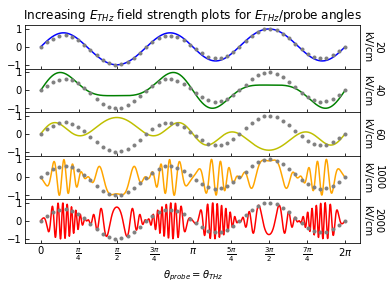

In [32]:
#plots equation 8, which recreates figure 3 at low fields
#but can plot again to show behavior at higher fields


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, sharey = True, 
                                         gridspec_kw =  
                                            {'hspace': 0})

ax1.plot(plankalphvar2/np.pi,deltaIvarequal1, 'b-') #equation 8
#ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1, '.', color = 'gray') #equation 9, 
#this or the next line can be commented out to show it normalized or not, this is repeated for each plot
ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1/np.max(approxdeltaIequal1), '.', color = 'gray')
ax1.set_title('Increasing $E_{THz}$ field strength plots for $E_{THz}$/probe angles')
ax1.set_ylabel('%s\nkV/cm' % int(ETHz1/10**5), rotation = 270)
#ax1.yaxis.tick_right()
#ax1.yaxis.set_ticks_position('both')
ax1.tick_params(direction="in")
ax1.set_ylim([-1.2,1.2])
ax1.yaxis.set_label_position("right")
ax1.yaxis.set_label_coords(1.07,0.5)

ax2.plot(plankalphvar2/np.pi,deltaIvarequal2, 'g-')
#ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2, '.', color = 'gray')
ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2/np.max(approxdeltaIequal2), '.', color = 'gray')
ax2.set_ylabel('%s\nkV/cm' % int(ETHz2/10**5), rotation = 270)
ax2.tick_params(direction="in")
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_label_coords(1.07,0.5)


ax3.plot(plankalphvar2/np.pi,deltaIvarequal3, 'y-')
#ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3, '.', color = 'gray')
ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3/np.max(approxdeltaIequal3), '.', color = 'gray')
ax3.set_ylabel('%s\nkV/cm' % int(ETHz3/10**5), rotation = 270)
ax3.tick_params(direction="in")
ax3.yaxis.set_label_position("right")
ax3.yaxis.set_label_coords(1.07,0.5)

ax4.plot(plankalphvar2/np.pi,deltaIvarequal4, color = 'orange')
#ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4, '.', color = 'gray')
ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4/np.max(approxdeltaIequal4), '.', color = 'gray')
ax4.set_ylabel('%s\nkV/cm' % int(ETHz4/10**5), rotation = 270) 
ax4.tick_params(direction="in")
ax4.yaxis.set_label_position("right")
ax4.yaxis.set_label_coords(1.07,0.5)

ax5.plot(plankalphvar2/np.pi,deltaIvarequal5, 'r-')
#ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5, '.', color = 'gray')
ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5/np.max(approxdeltaIequal5), '.', color = 'gray')
ax5.set_ylabel('%s\nkV/cm' % int(ETHz5/10**5), rotation = 270) 
ax5.yaxis.set_label_position("right")
ax5.yaxis.set_label_coords(1.07,0.5)
ax5.tick_params(direction="in")
ax5.set_xlabel(r'$\theta_{probe}=\theta_{THz}$')
xticklabels = [0,r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',
               r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$']
#ax5.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.xticks([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],xticklabels)
#plt.setp(ax5, xticklabels=xticklabels)


#fig.tight_layout()
#plt.savefig('plankenequation8.pdf')

In [33]:
#Gives delta I for equation 8 for 2D plotting, with equation 9 overlayed on each plot
#to recreate the bottom plot in figure 3 (only recreating it in low fields), 
#where theta(probe)=theta(alpha) 
#(or theta = alpha with Planken's angle labels)
#Change ETHz values here to show different scale plots in the next cell

plankalphvar2 = np.linspace(0, 2*np.pi, 1000)

ETHz1 = 10010*10**3/10**-2  #THz electric field E strength, normally kV/cm. 
ETHz2 = 10020*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz3 = 10030*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz4 = 10040*10**3/10**-2  #THz electric field E strength, normally kV/cm.
ETHz5 = 10050*10**3/10**-2  #THz electric field E strength, normally kV/cm.

deltaIvarequal1 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal1 = ((ETHz1*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))


deltaIvarequal2 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal2 = ((ETHz2*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal3 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal3 = ((ETHz3*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal4 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal4 = ((ETHz4*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

deltaIvarequal5 = (np.array(np.sin(2*((plankalphvar2)-(-np.arctan
                            (2*np.tan(plankalphvar2))
        /2-n*np.pi/2)))*np.sin((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
            (np.cos(plankalphvar2)*(np.sin((-np.arctan(
    2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2+np.cos(plankalphvar2+2*
    (-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2))-(np.cos(plankalphvar2)
    *(np.cos((-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2)))**2-
    np.cos(plankalphvar2+2*(-np.arctan(2*np.tan(plankalphvar2))/2-n*np.pi/2
                           )))))))

approxdeltaIequal5 = ((ETHz5*indref**3*r41*angfreq*length/(2*pc.c))*
(np.cos(plankalphvarapprox)*np.sin(2*plankalphvarapprox)+2*
        np.sin(plankalphvarapprox)*np.cos(2*plankalphvarapprox)))

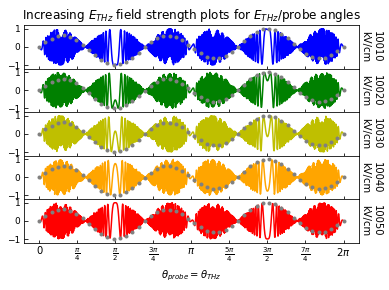

In [34]:
#plots equation 8, which recreates figure 3 at low fields
#but can plot again to show behavior at higher fields


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, sharey = True, 
                                         gridspec_kw =  
                                            {'hspace': 0})

ax1.plot(plankalphvar2/np.pi,deltaIvarequal1, 'b-') #equation 8
#ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1, '.', color = 'gray') #equation 9, 
#this or the next line can be commented out to show it normalized or not, this is repeated for each plot
ax1.plot(plankalphvarapprox/np.pi,approxdeltaIequal1/np.max(approxdeltaIequal1), '.', color = 'gray')
ax1.set_title('Increasing $E_{THz}$ field strength plots for $E_{THz}$/probe angles')
ax1.set_ylabel('%s\nkV/cm' % int(ETHz1/10**5), rotation = 270)
#ax1.yaxis.tick_right()
#ax1.yaxis.set_ticks_position('both')
ax1.tick_params(direction="in")
ax1.set_ylim([-1.2,1.2])
ax1.yaxis.set_label_position("right")
ax1.yaxis.set_label_coords(1.07,0.5)
ax1.tick_params(axis='y', which='major', labelsize=9)

ax2.plot(plankalphvar2/np.pi,deltaIvarequal2, 'g-')
#ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2, '.', color = 'gray')
ax2.plot(plankalphvarapprox/np.pi,approxdeltaIequal2/np.max(approxdeltaIequal2), '.', color = 'gray')
ax2.set_ylabel('%s\nkV/cm' % int(ETHz2/10**5), rotation = 270)
ax2.tick_params(direction="in")
ax2.yaxis.set_label_position("right")
ax2.yaxis.set_label_coords(1.07,0.5)
ax2.tick_params(axis='y', which='major', labelsize=9)

ax3.plot(plankalphvar2/np.pi,deltaIvarequal3, 'y-')
#ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3, '.', color = 'gray')
ax3.plot(plankalphvarapprox/np.pi,approxdeltaIequal3/np.max(approxdeltaIequal3), '.', color = 'gray')
ax3.set_ylabel('%s\nkV/cm' % int(ETHz3/10**5), rotation = 270)
ax3.tick_params(direction="in")
ax3.yaxis.set_label_position("right")
ax3.yaxis.set_label_coords(1.07,0.5)
ax3.tick_params(axis='y', which='major', labelsize=9)

ax4.plot(plankalphvar2/np.pi,deltaIvarequal4, color = 'orange')
#ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4, '.', color = 'gray')
ax4.plot(plankalphvarapprox/np.pi,approxdeltaIequal4/np.max(approxdeltaIequal4), '.', color = 'gray')
ax4.set_ylabel('%s\nkV/cm' % int(ETHz4/10**5), rotation = 270) 
ax4.tick_params(direction="in")
ax4.yaxis.set_label_position("right")
ax4.yaxis.set_label_coords(1.07,0.5)
ax4.tick_params(axis='y', which='major', labelsize=9)

ax5.plot(plankalphvar2/np.pi,deltaIvarequal5, 'r-')
#ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5, '.', color = 'gray')
ax5.plot(plankalphvarapprox/np.pi,approxdeltaIequal5/np.max(approxdeltaIequal5), '.', color = 'gray')
ax5.set_ylabel('%s\nkV/cm' % int(ETHz5/10**5), rotation = 270) 
ax5.yaxis.set_label_position("right")
ax5.yaxis.set_label_coords(1.07,0.5)
ax5.tick_params(direction="in")
ax5.set_xlabel(r'$\theta_{probe}=\theta_{THz}$')
xticklabels = [0,r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',
               r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$',r'$2\pi$']
#ax5.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
plt.xticks([0,0.25,0.5,0.75,1,1.25,1.5,1.75,2],xticklabels)
#plt.setp(ax5, xticklabels=xticklabels)
ax5.tick_params(axis='y', which='major', labelsize=9)

#fig.tight_layout()
#plt.savefig('plankenequation8nnnnnn.pdf')

In [35]:
#use this one